In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [ ]:
import mediapipe as mp

In [ ]:
mp_pose = mp.solutions.pose

In [ ]:
pose = mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) #confidence 수치 조정하면 정확도 개선됨. 숫자 낮추면 정확도 낮아짐)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

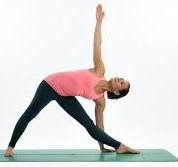

In [ ]:
img_bgr = cv2.imread('/content/model3.jpg')
cv2_imshow(img_bgr)

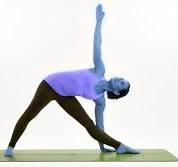

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
cv2_imshow(img_rgb)

In [ ]:
w, h = img_bgr.shape[1], img_bgr.shape[0]
print(w, h)

178 167


In [ ]:
img = img_bgr.copy()
#얘는 필요한 건 아님

In [ ]:
results = pose.process(img_rgb)
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
print(results.pose_landmarks.landmark)

[x: 0.665206552
y: 0.476027
z: -0.535181522
visibility: 0.999993563
, x: 0.678418219
y: 0.497029513
z: -0.519524872
visibility: 0.999960661
, x: 0.677090049
y: 0.504976869
z: -0.519397438
visibility: 0.999979377
, x: 0.675717711
y: 0.512658596
z: -0.519473732
visibility: 0.99994874
, x: 0.680504143
y: 0.47970733
z: -0.501544833
visibility: 0.999974728
, x: 0.680701852
y: 0.475808889
z: -0.501675546
visibility: 0.999984
, x: 0.680915594
y: 0.472549856
z: -0.501696289
visibility: 0.999976277
, x: 0.661248565
y: 0.535299599
z: -0.380920529
visibility: 0.999957323
, x: 0.671520114
y: 0.486346573
z: -0.30647245
visibility: 0.999992728
, x: 0.64203763
y: 0.4894045
z: -0.483979076
visibility: 0.999977589
, x: 0.647309065
y: 0.469228953
z: -0.462204933
visibility: 0.999990106
, x: 0.556368887
y: 0.605283141
z: -0.172633082
visibility: 0.999930501
, x: 0.560641527
y: 0.418949604
z: -0.286307544
visibility: 0.999999762
, x: 0.545111358
y: 0.778758228
z: -0.169667318
visibility: 0.969297647
, x: 

In [ ]:
print(len(results.pose_landmarks.landmark))
#0 부터 32번까지 랜드마크를 줘서 총 33개

33


In [ ]:
print(results.pose_landmarks.landmark[0])
#위에 하고나면 다 landmark로 되어있음. 그래서 landmark로 들어감.
#0번째가 코
#대부분 normalized값
#2d로 갈 거라 z축은 안쓸거고.
#x,y 0~1 사이 값
#위에서 width랑 height구한 거
#x랑 width 곱하고, y랑 height 곱하면 코의 위치를 알 수 있음.

x: 0.665206552
y: 0.476027
z: -0.535181522
visibility: 0.999993563



In [ ]:
nose_x = int(results.pose_landmarks.landmark[0].x * w)   #float으로 나와서 int로 바꾼 거
print(nose_x)
nose_y = int(results.pose_landmarks.landmark[0].y * h)
print(nose_y)

118
79


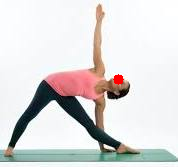

In [ ]:
cv2.circle(img, (nose_x, nose_y), 5, (0, 0, 255), -1)
cv2_imshow(img)

In [ ]:
print(results.pose_landmarks.landmark[12])
print(results.pose_landmarks.landmark[14])
print(results.pose_landmarks.landmark[16])

x: 0.560641527
y: 0.418949604
z: -0.286307544
visibility: 0.999999762

x: 0.550914168
y: 0.263097376
z: -0.335716844
visibility: 0.998868346

x: 0.557653308
y: 0.108219594
z: -0.504879415
visibility: 0.995317101



In [ ]:
shoulder_x = int(results.pose_landmarks.landmark[12].x * w)
print(shoulder_x)
shoulder_y = int(results.pose_landmarks.landmark[12].y * h)
print(shoulder_y)
elbow_x = int(results.pose_landmarks.landmark[14].x * w)
print(elbow_x)
elbow_y = int(results.pose_landmarks.landmark[14].y * h)
print(elbow_y)
wrist_x = int(results.pose_landmarks.landmark[16].x * w)
print(wrist_x)
wrist_y = int(results.pose_landmarks.landmark[16].y * h)
print(wrist_y)

99
69
98
43
99
18


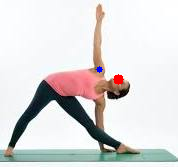

In [ ]:
cv2.circle(img, (shoulder_x, shoulder_y), 3, (255, 0, 0), -1)
cv2_imshow(img)

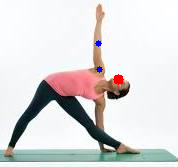

In [ ]:
cv2.circle(img, (elbow_x, elbow_y), 3, (255, 0, 0), -1)
cv2_imshow(img)

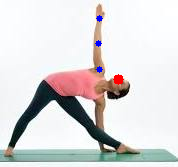

In [ ]:
cv2.circle(img, (wrist_x, wrist_y), 3, (255, 0, 0), -1)
cv2_imshow(img)

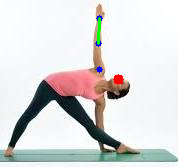

In [ ]:
cv2.line(img, (wrist_x, wrist_y), (elbow_x, elbow_y), (0, 255, 0), 2)
cv2_imshow(img)

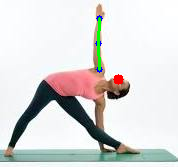

In [ ]:
cv2.line(img, (elbow_x, elbow_y), (shoulder_x, shoulder_y), (0, 255, 0), 2)
cv2_imshow(img)

In [ ]:
import numpy as np

In [ ]:
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

angle = calculate_angle((shoulder_x, shoulder_y), (elbow_x, elbow_y), (wrist_x, wrist_y))
print(angle)
print(f'angle : {int(angle)}')

175.5067917955957
angle : 175


In [ ]:
cv2.putText(img, int(angle),(elbow_x, elbow_y), 0, (255, 255, 255), 2)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'
